##### duration: quick - half duration of video'
- we can run this function and the inference function together as a job

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate,username,n_ephys_streams,max_video_duration_m,use_local,User
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN
1,M04003,30,24-05-01-13-51-17-581428,2024-05-01_13-51-09,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN
2,M04002,30,24-05-01-15-37-07-757018,2024-05-01_15-36-57,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN


### Run

In [6]:
for idx, recording_row in recording_df.iterrows():
    break

In [7]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [8]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [9]:
output_directory_gimbal = output_directory / 'gimbal' / recording_row.video_recording_id
output_directory_gimbal.mkdir(parents=True, exist_ok=True)

In [10]:
from multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal import GimbalTrainer 

/n/groups/datta/tim_sainburg/projects/multicamera_airflow_pipeline/multicamera_airflow_pipeline/tim_240731/keypoints/train_gimbal.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
I0000 00:00:1727461047.971133   47007 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Python version: 3.10.14 (main, Ma

In [13]:
!ls {output_directory / 'triangulation' / '24-05-01-13-26-43-110846'}

confidences_2d.float32.90009x6x25.mmap
confidences_3d.float32.90009x25.mmap
predictions_2d.float32.90009x6x25x2.mmap
predictions_3d.float32.90009x25x3.mmap
reprojection_errors_0.jpg
reprojection_errors_1.jpg
reprojection_errors.float32.90009x6x25.mmap
triangulation_completed.log
triangulation_sample_0.jpg
triangulation_sample_1.jpg


In [12]:
gimbal_trainer = GimbalTrainer(
    gimbal_output_directory=output_directory_gimbal,
    calibration_folder=(
        output_directory
        / "camera_calibration"
        / recording_row.calibration_id
        / "jarvis"
        / "CalibrationParameters"
    ),
    predictions_3d_directory=(
        output_directory / "triangulation" / recording_row.video_recording_id
    ),
    samplerate=int(recording_row.samplerate),
    recompute_completed = True,
    num_iters_train=10000
)

In [13]:
gimbal_trainer.run()

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Running gimbal training on /n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/gimbal/24-05-01-13-26-43-110846
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Loading calibration data
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Loading predictions
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Removing outliers
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Filling in NaNs


training GIMBAL:   0%|          | 0/10000 [00:00<?, ?it/s]

In [14]:
!ls {output_directory_gimbal}

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Python version: 3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:JAX version: 0.4.16
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:Backend: gpu
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.train_gimbal:JAX devices: [gpu(id=0)]


completed.log			gimbal_success.bool.10000x1.mmap
fit_likelihood.jpg		gimbal_success.bool.90009x1.mmap
gimbal.float32.10000x25x3.mmap	joint_directions.jpg
gimbal.float32.90009x25x3.mmap	keypoints_order_gimbal.npy
gimbal_params.p			skeleton_distances.jpg


In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

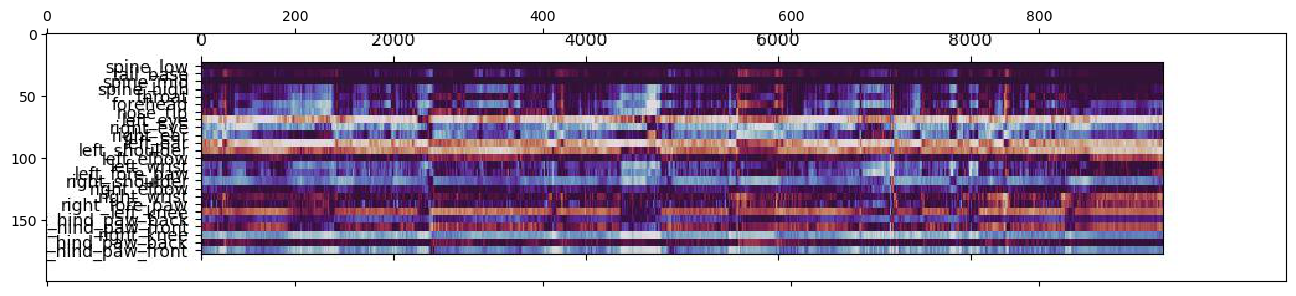

In [16]:
img = mpimg.imread(output_directory_gimbal/ 'joint_directions.jpg')
plt.matshow(img)

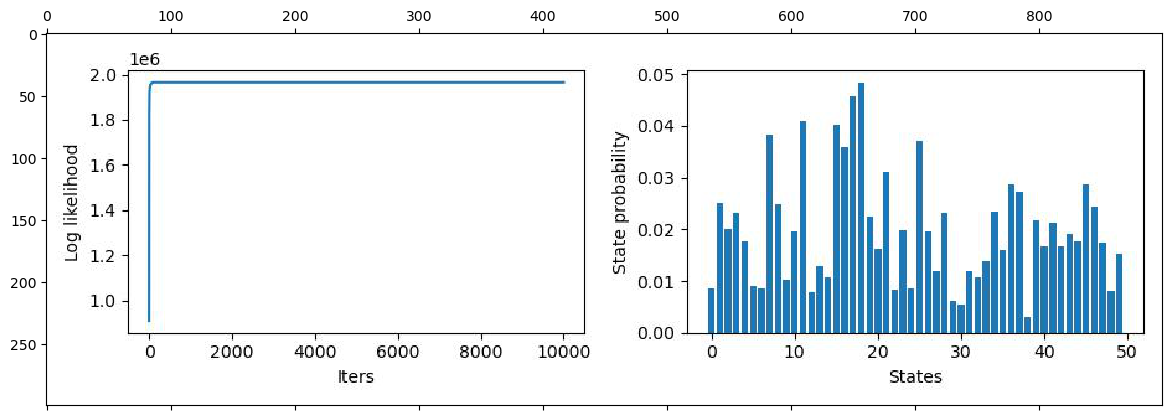

In [17]:
img = mpimg.imread(output_directory_gimbal/ 'fit_likelihood.jpg')
plt.matshow(img)

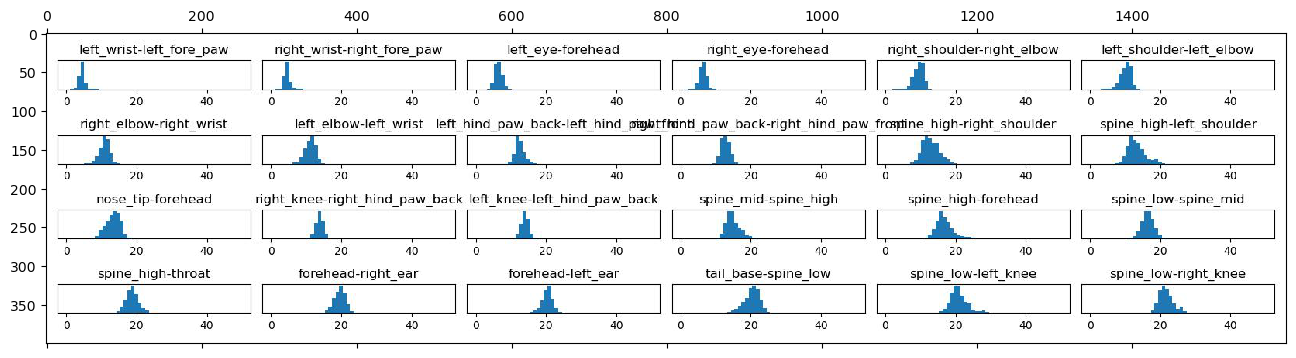

In [18]:
img = mpimg.imread(output_directory_gimbal/ 'skeleton_distances.jpg')
plt.matshow(img)